## Project Intro: Intel Lab Data

This notebook contains information about data collected from 54 sensors deployed in the Intel Berkeley Research lab between February 28th and April 5th, 2004.

`Mica2Dot` sensors with weather boards collected timestamped topology information, along with humidity, temperature, light and voltage values once every 31 seconds.

Source: http://db.csail.mit.edu/labdata/labdata.html

## Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

### Dataset #1: Sensor Data

In [3]:
sensor_data = pd.read_csv('data/data.txt', sep=" ", header=None)
sensor_data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [4]:
sensor_data.columns = ['date', 'time', 'epoch', 'mote_id', 
                       'temperature', 'humidity', 'light', 'voltage']
sensor_data.head()

,date,time,epoch,mote_id,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [5]:
sensor_data['datetime'] = sensor_data['date'] + ' ' + sensor_data['time']
sensor_data['datetime'] = pd.to_datetime(sensor_data['datetime'])
sensor_data['datetime'] = sensor_data['datetime'].values.astype('<M8[h]')
sensor_data.head(10)

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397,2004-03-31 03:00:00
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964,2004-02-28 00:00:00
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742,2004-02-28 01:00:00
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742,2004-02-28 01:00:00
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964,2004-02-28 01:00:00
5,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.94010,45.08,2.68742,2004-02-28 01:00:00
6,2004-02-28,01:09:22.323858,23,1.0,19.1652,38.87200,45.08,2.68742,2004-02-28 01:00:00
7,2004-02-28,01:09:46.109598,24,1.0,19.1652,38.80390,45.08,2.68742,2004-02-28 01:00:00
8,2004-02-28,01:10:16.6789,25,1.0,19.1456,38.83790,45.08,2.69964,2004-02-28 01:00:00
9,2004-02-28,01:10:46.250524,26,1.0,19.1456,38.87200,45.08,2.68742,2004-02-28 01:00:00


In [6]:
sensor_data.sort_values(by=['mote_id', 'datetime'], inplace=True)
sensor_data.tail()

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
2313212,2004-04-03,16:00:41.408433,178,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313213,2004-04-03,16:03:41.027159,179,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313214,2004-04-03,16:24:41.364247,186,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313215,2004-04-03,16:33:40.80513,188,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313216,2004-04-03,16:36:40.458726,189,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00


In [7]:
sensor_data.isna().sum()

date               0
time               0
epoch              0
mote_id          526
temperature      901
humidity         902
light          93878
voltage          526
datetime           0
dtype: int64

In [8]:
sensor_data.dropna(inplace=True)
sensor_data.isna().sum()

date           0
time           0
epoch          0
mote_id        0
temperature    0
humidity       0
light          0
voltage        0
datetime       0
dtype: int64

In [70]:
sensor_data.drop_duplicates('datetime', inplace=True)
sensor_data.tail()

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
2308804,2004-04-04,01:41:52.80531,1605,58.0,22.0366,34.5012,3.22,2.61639,2004-04-04 01:00:00
2308806,2004-04-04,07:14:56.864183,1607,58.0,21.0664,35.6110,5.06,2.59354,2004-04-04 07:00:00
2308808,2004-04-04,11:48:02.390186,1609,58.0,21.5956,35.8530,48.76,2.58226,2004-04-04 11:00:00
2308810,2004-04-04,16:21:06.290436,1611,58.0,23.9378,34.6403,86.48,2.59354,2004-04-04 16:00:00
2308812,2004-04-04,20:54:11.616528,1613,58.0,21.6348,37.1963,3.22,2.56000,2004-04-04 20:00:00


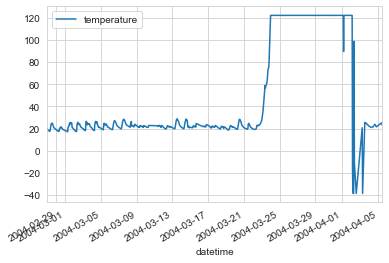

In [71]:
sensor_data.plot(x='datetime', y='temperature')

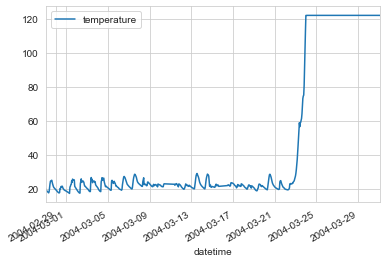

In [72]:
mote1 = sensor_data[sensor_data['mote_id'] == 1.0 ]
mote1.plot(x='datetime', y='temperature')

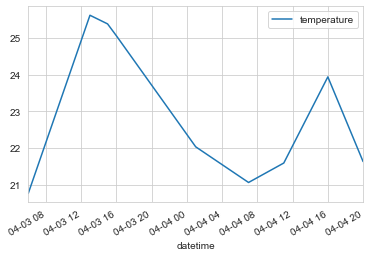

In [73]:
mote58 = sensor_data[sensor_data['mote_id'] == 58.0 ]
mote58.plot(x='datetime', y='temperature')

In [76]:
mote1_adtk = mote1[['datetime', 'temperature']]
mote1_adtk.set_index('datetime', inplace=True)
mote1_adtk.head()

,temperature
datetime,
2004-02-28 00:00:00,19.9884
2004-02-28 01:00:00,19.3024
2004-02-28 02:00:00,18.8712
2004-02-28 03:00:00,18.5478
2004-02-28 04:00:00,18.2734


In [51]:
from adtk.data import validate_series
s_train = validate_series(mote1_adtk[:264])
print(s_train)

                     temperature
datetime                        
2004-02-28 00:00:00      19.9884
2004-02-28 01:00:00      19.3024
2004-02-28 02:00:00      18.8712
2004-02-28 03:00:00      18.5478
2004-02-28 04:00:00      18.2734
...                          ...
2004-03-09 19:00:00      22.7226
2004-03-09 20:00:00      22.6246
2004-03-09 21:00:00      22.4776
2004-03-09 22:00:00      22.2522
2004-03-09 23:00:00      22.2424

[264 rows x 1 columns]


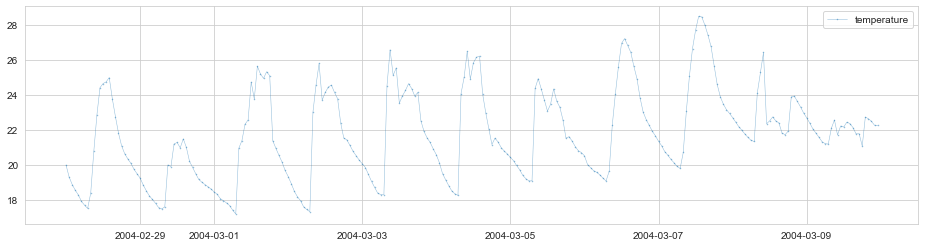

In [52]:
from adtk.visualization import plot
plot(s_train)

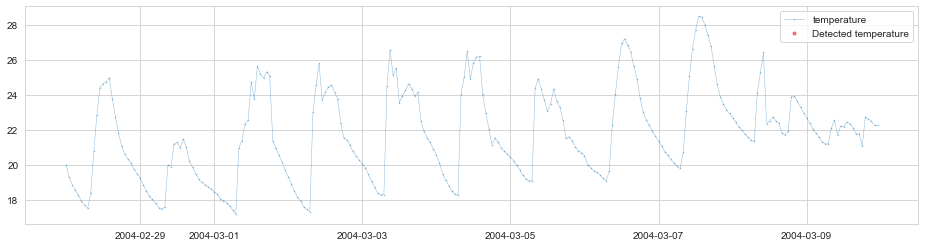

In [53]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly_pred=anomalies, ap_color='red', ap_marker_on_curve=True)

In [87]:
s_test = pd.read_csv('data/s_test.csv', sep=",", index_col='datetime')
s_test.index = pd.to_datetime(s_test.index)
s_test.index = s_test.index.values.astype('<M8[h]')
s_test.head(25)

,temperature
2004-03-10 00:00:00,0
2004-03-10 01:00:00,0
2004-03-10 02:00:00,0
2004-03-10 03:00:00,0
2004-03-10 04:00:00,0
2004-03-10 05:00:00,0
2004-03-10 06:00:00,0
2004-03-10 07:00:00,0
2004-03-10 08:00:00,0
2004-03-10 09:00:00,0


In [88]:
s_test = validate_series(s_test)
print(s_test)

                     temperature
2004-03-10 00:00:00            0
2004-03-10 01:00:00            0
2004-03-10 02:00:00            0
2004-03-10 03:00:00            0
2004-03-10 04:00:00            0
2004-03-10 05:00:00            0
2004-03-10 06:00:00            0
2004-03-10 07:00:00            0
2004-03-10 08:00:00            0
2004-03-10 09:00:00            0
2004-03-10 10:00:00            0
2004-03-10 11:00:00            0
2004-03-10 12:00:00            0
2004-03-10 13:00:00            0
2004-03-10 14:00:00            0
2004-03-10 15:00:00            0
2004-03-10 16:00:00            0
2004-03-10 17:00:00            0
2004-03-10 18:00:00            0
2004-03-10 19:00:00            0
2004-03-10 20:00:00            0
2004-03-10 21:00:00            0
2004-03-10 22:00:00            0
2004-03-10 23:00:00            0
2004-03-11 00:00:00            0
2004-03-11 01:00:00            0


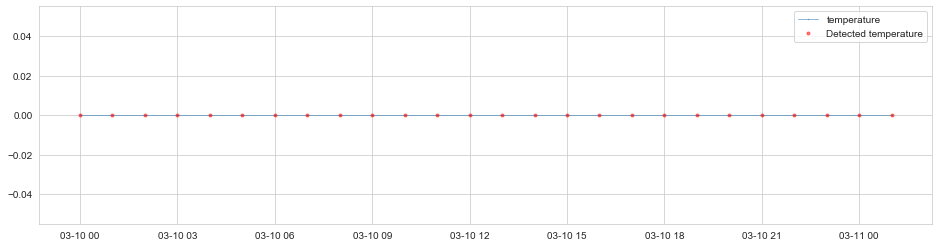

In [89]:
anomalies_pred = seasonal_ad.detect(s_test)
plot(s_test, anomaly_pred=anomalies_pred, ts_linewidth=1, ap_color='red', ap_marker_on_curve=True)